In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
titanic_data = pd.read_csv("datas/titanic_train.csv")

In [21]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA 

<Axes: >

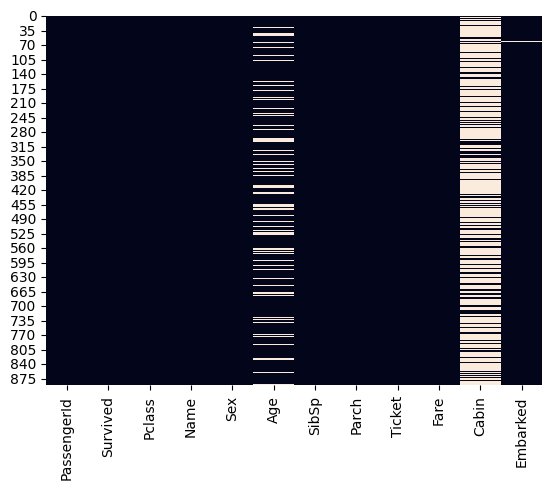

In [22]:
sns.heatmap(titanic_data.isnull(), cbar=False)

<Axes: xlabel='Survived', ylabel='count'>

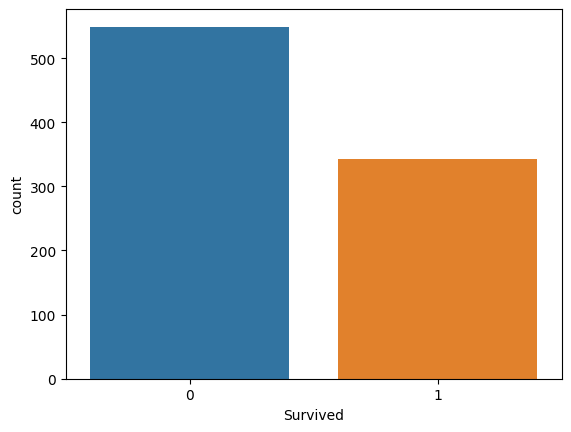

In [23]:
sns.countplot(x='Survived', data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

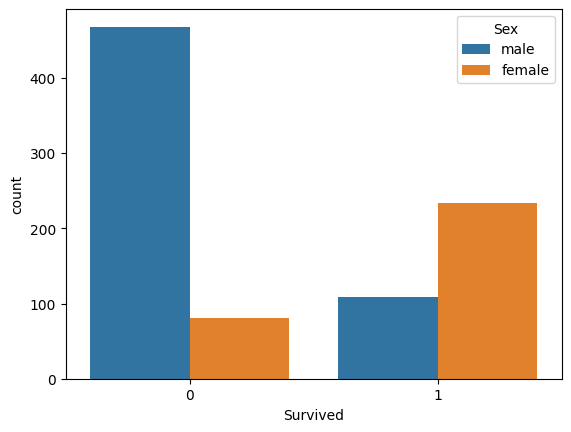

In [24]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

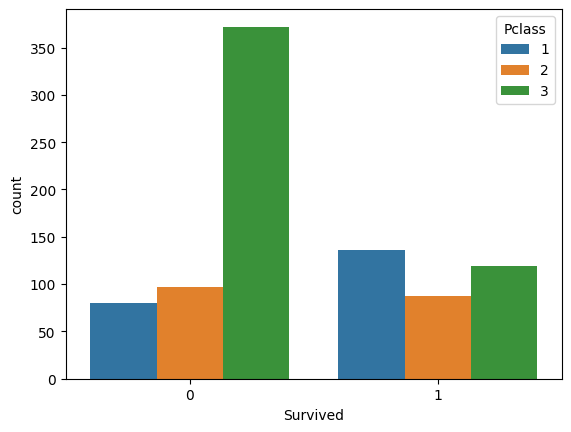

In [25]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

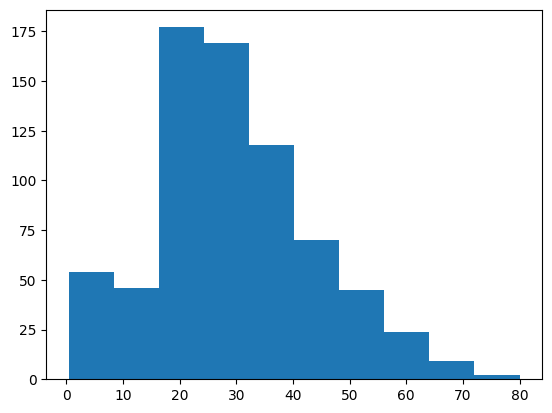

In [26]:
plt.hist(titanic_data['Age'].dropna())

<Axes: xlabel='Pclass', ylabel='Age'>

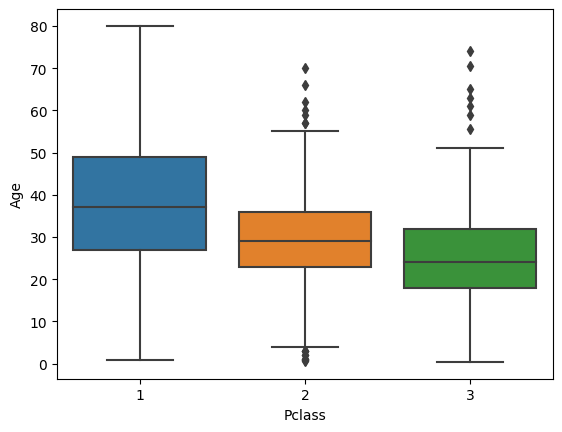

In [28]:
sns.boxplot(x=titanic_data['Pclass'], y=titanic_data['Age'])

In [33]:
def impute_missing_age(columns):
    age = columns[0]
    passenger_class = columns[1]
    if pd.isnull(age):
        if(passenger_class == 1):
            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()
        elif(passenger_class == 2):
            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()
        elif(passenger_class == 3):
            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()
    else:
        return age
#Impute the missing Age data
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_missing_age,
axis = 1)

<Axes: >

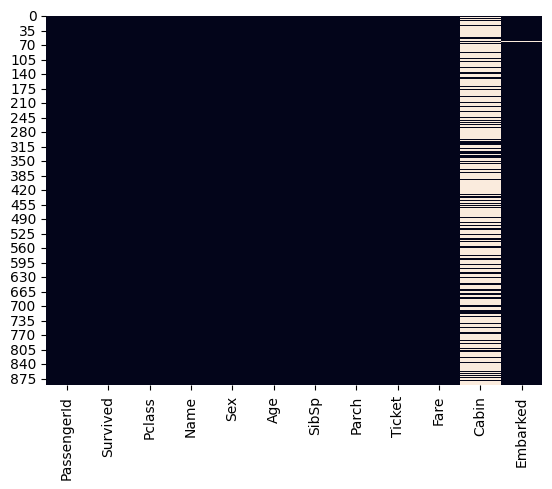

In [36]:
sns.heatmap(data=titanic_data.isnull(),cbar=False)

In [37]:
titanic_data.drop('Cabin', axis=1, inplace = True)
titanic_data.dropna(inplace = True)


In [46]:
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [53]:
sex = pd.get_dummies(titanic_data['Sex'])
embarked = pd.get_dummies(titanic_data['Embarked'])

In [54]:
titanic_data = pd.concat([titanic_data,sex,embarked],axis=1)


In [56]:
titanic_data.drop(['Name', 'PassengerId', 'Ticket', 'Sex', 'Embarked'], axis =1, inplace = True)

In [59]:
titanic_data = titanic_data.astype(int)

In [60]:
titanic_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,female,male,C,Q,S
0,0,3,22,1,0,7,1,0,1,0,0,1
1,1,1,38,1,0,71,0,1,0,1,0,0
2,1,3,26,0,0,7,0,1,0,0,0,1
3,1,1,35,1,0,53,0,1,0,0,0,1
4,0,3,35,0,0,8,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13,1,0,1,0,0,1
887,1,1,19,0,0,30,0,1,0,0,0,1
888,0,3,25,1,2,23,0,1,0,0,0,1
889,1,1,26,0,0,30,1,0,1,1,0,0


In [61]:
X = titanic_data.drop('Survived',axis=1)
y = titanic_data['Survived']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3)

## Model 

In [69]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

## Model Evaluation

In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [76]:
print("\n************Classification Report************\n")
print(classification_report(y_test, predictions))
print("\n***********Confusion Matrix***************\n")
print(confusion_matrix(y_test, predictions))


************Classification Report************

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       175
           1       0.75      0.74      0.74        92

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.82      0.82      0.82       267


***********Confusion Matrix***************

[[152  23]
 [ 24  68]]
